# **Netflix Visualization, EDA**

This notebook provides an EDA of Netflix data using various graphs and visualizations.

## **Loading the dataset**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("../input/netflix-shows/netflix_titles.csv")
print(dataset.isna().sum())
print()
print('Number of rows:', len(dataset))

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Number of rows: 8807


This output show the null values for feature and the structure of the dataset, composed by 12 feature and 8807 rows.

Feature description:
* type : if the content is a film or a tv show
* title : the title of the content
* director : director of the movie (tv show doesn't have one, that's why there are many null values)
* cast : actors involved in the content
* country : country where the content was produced
* date_added : date it was added on netflix
* release_year : release year of the content
* rating : describe how the content is classified for the public
* duration : total duration of the content (in minutes for films and in number of season for tv show)
* listed_in : categories of the content
* description : summary description

## **Distribution for type**

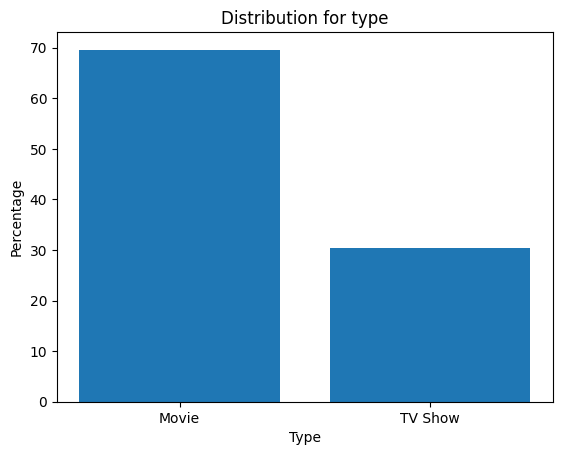

In [15]:
type_counts = dataset['type'].value_counts()
percentages = (type_counts / type_counts.sum()) * 100

fig, ax = plt.subplots()
ax.bar(type_counts.index, percentages)
ax.set_title('Distribution for type')
ax.set_ylabel('Percentage')
ax.set_xlabel('Type')
plt.show()

It can be seen that approximatly 70% of the Netflix content's is from Movies.

## **Number of content added per year**

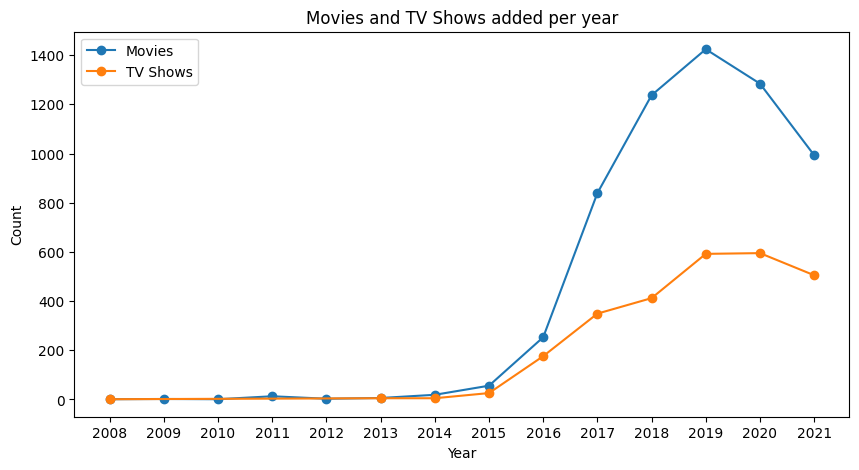

In [16]:
movie = dataset[dataset["type"] == "Movie"]['date_added'].dropna().map(lambda x: x.split(",")[1].strip())
show = dataset[dataset["type"] == "TV Show"]['date_added'].dropna().map(lambda x: x.split(",")[1].strip())

movie_counts = movie.value_counts().sort_index()
show_counts = show.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(movie_counts.index, movie_counts.values, label='Movies', marker='o')
plt.plot(show_counts.index, show_counts.values, label='TV Shows', marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Movies and TV Shows added per year')
plt.legend()
plt.show()

Through this graph we can study the evolution of Netflix, that we can suddivide in 3 principal phases:
* *2008-2014* : moderate growth, as Netflix was still building its streaming content catalog and negotiating licensing rights. In 2013, it launched original content under the Netflix Originals brand
* *2015-2019* : from the 2016 Netflix bring his streaming service in more than 190 countries
* *2020-end* : at the start of the 2020, first cases of Covid19 appeared and president Trump declared a public health emergency; cause of this, the production of films and TV series stops.

## **Content added per month and year**

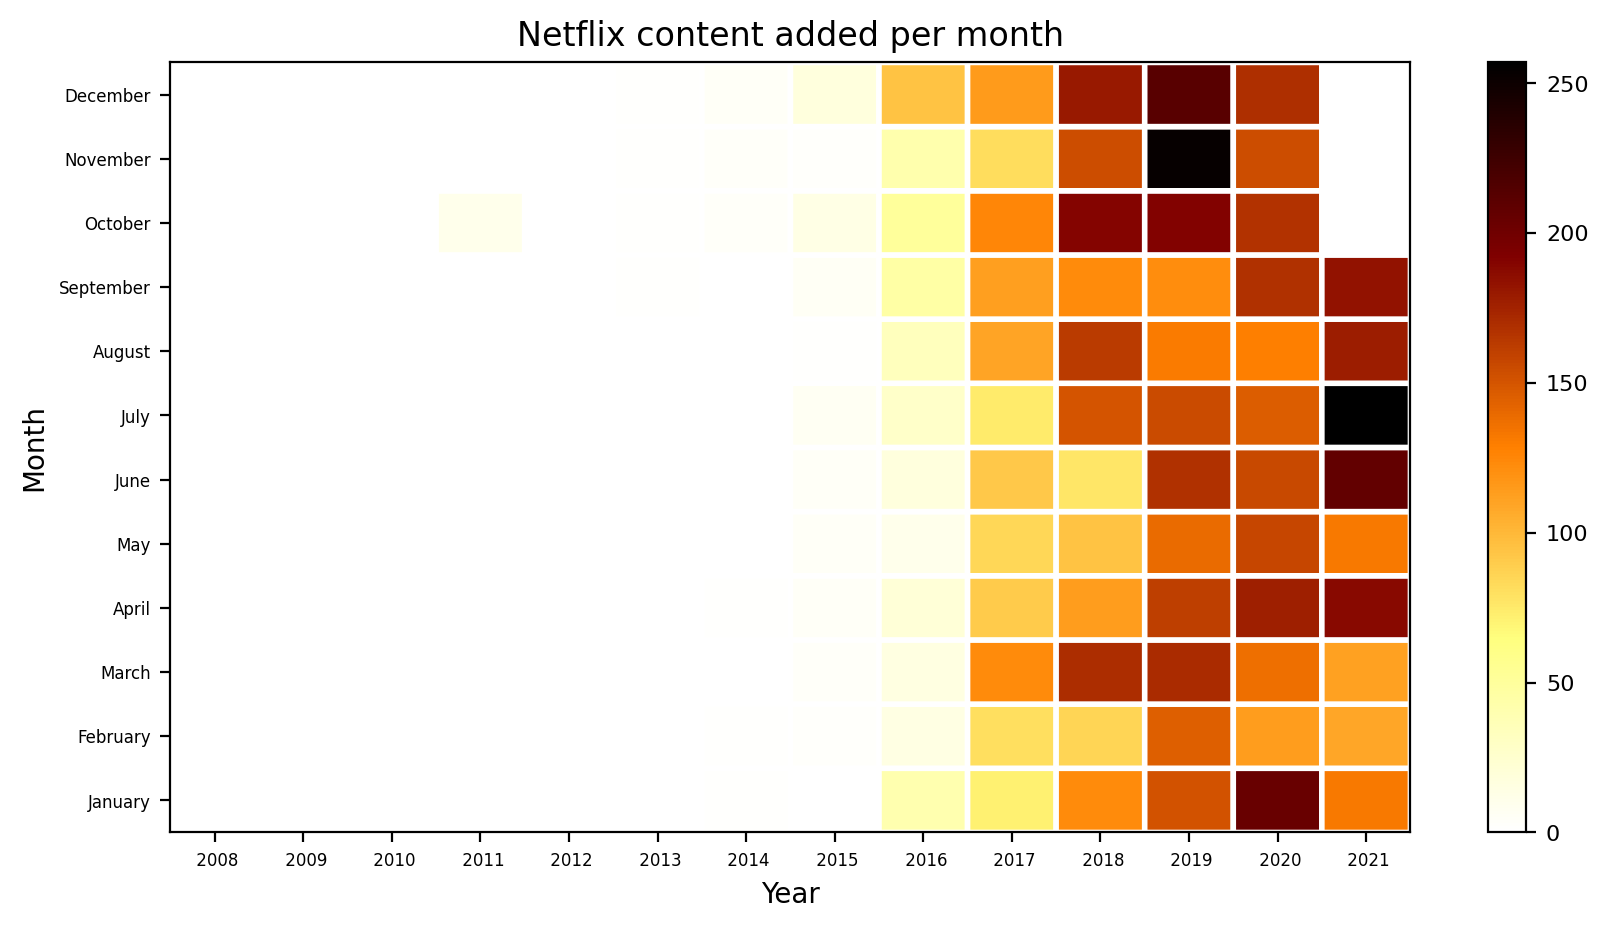

In [17]:
added = dataset[['date_added']].dropna()
added['year'] = added['date_added'].map(lambda x : x.split(",")[1])
added['month'] = added['date_added'].map(lambda x: x.split(" ")[0])

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
count = added.groupby('year')['month'].value_counts().unstack().fillna(0)[month].T

plt.figure(figsize=(10, 5), dpi=200)

plt.pcolor(count, cmap='afmhot_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(count.columns), 1), count.columns, fontsize=6)  
plt.yticks(np.arange(0.5, len(count.index), 1), count.index, fontsize=6)  

plt.title('Netflix content added per month') 
plt.xlabel('Year')
plt.ylabel('Month')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)  

plt.show()


## **Distribution of production**

I will explain the content production in two graphs:
* the first is more general, where production are divided by continent
* the second more specific, where production are divided by country

#### **Produciton by continent**

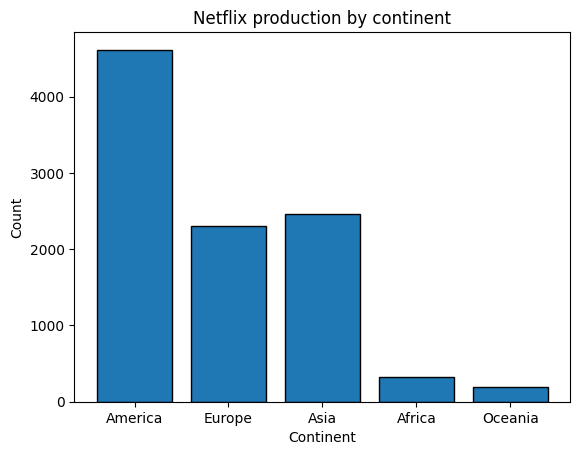

In [26]:
America =  ["Brazil", "Argentina", "Colombia", "Chile", "Peru", "Uruguay", "Paraguay", "Ecuador", "Venezuela","United States", "Canada", "Mexico", "Guatemala", "Puerto Rico", "Bermuda", "Cayman Islands", "Bahamas", "Panama", "Jamaica", "Nicaragua", "Dominican Republic", "Cuba"]
Europe =  [
        "United Kingdom", "France", "Spain", "Germany", "Italy", "Belgium", "Netherlands", "Denmark",
        "Ireland", "Sweden", "Poland", "Norway", "Finland", "Iceland", "Greece", "Hungary", "Bulgaria",
        "Romania", "Austria", "Luxembourg", "Portugal", "Switzerland", "Czech Republic", "Slovakia",
        "Slovenia", "Croatia", "Ukraine", "Russia", "Serbia", "Albania", "Belarus", "Latvia",
        "Lithuania", "Malta", "Cyprus", "Georgia", "Montenegro", "Vatican City", "Liechtenstein"
    ]
Asia =  [
        "India", "Japan", "South Korea", "China", "Hong Kong", "Taiwan", "Thailand", "Indonesia", "Philippines",
        "Singapore", "Malaysia", "Pakistan", "Vietnam", "Cambodia", "Lebanon", "Israel", "Jordan", "Kuwait",
        "Qatar", "Saudi Arabia", "United Arab Emirates", "Bangladesh", "Sri Lanka", "Kazakhstan", "Armenia",
        "Nepal", "Iraq", "Iran", "Mongolia", "Afghanistan", "Syria", "Azerbaijan", "Palestine"
    ]
Africa = [
        "Egypt", "Nigeria", "Kenya", "South Africa", "Morocco", "Ghana", "Senegal", "Algeria",
        "Zimbabwe", "Ethiopia", "Burkina Faso", "Cameroon", "Namibia", "Mauritius", "Angola",
        "Botswana", "Sudan", "Somalia", "Uganda", "Malawi", "Mozambique"
    ]
Oceania = ["Australia", "New Zealand", "Samoa"]

eu = am = asi = af = oc = 0
for line in dataset['country']:
    if pd.isna(line):
        continue
    for val in [country.strip() for country in line.split(",")]:
        if val in America:
            am += 1
        elif val in Europe:
            eu += 1
        elif val in Asia:
            asi += 1
        elif val in Africa:
            af += 1
        elif val in Oceania:
            oc += 1
        else:
            continue

countries = ["America", "Europe", "Asia", "Africa", "Oceania"]
points = [am, eu, asi, af, oc]

fig, ax = plt.subplots()
ax.bar(countries, points, edgecolor='black')
ax.set_title('Netflix production by continent')
ax.set_xlabel('Continent')
ax.set_ylabel('Count')
plt.show()           


#### **Produciton by country**

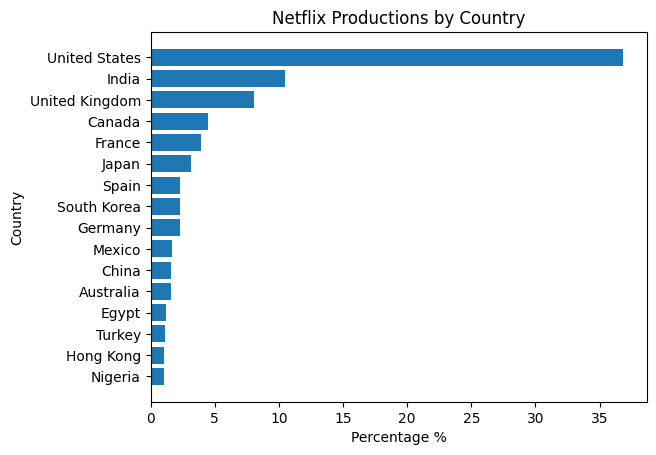

In [19]:
type_counts = dataset['country'].str.split(",").explode().str.strip().value_counts()
percentages = (type_counts / type_counts.sum()) * 100
all_country = percentages
percentages = percentages[percentages > 1].sort_values()

fig, ax = plt.subplots()
ax.barh(percentages.index, percentages)
ax.set_title('Netflix Productions by Country')
ax.set_xlabel('Percentage %')
ax.set_ylabel('Country')
plt.show()


So, we can say that content production is higher in America (more that the 1/3 of the total), while Europe and Asia are similar.

From the two charts, we can see that the countries with the highest content production in each continent are: United Kingdom for Europe, India for Asia, United States for America, Egypt for Africa and Australia for Oceania.

## **Distribution for rating**

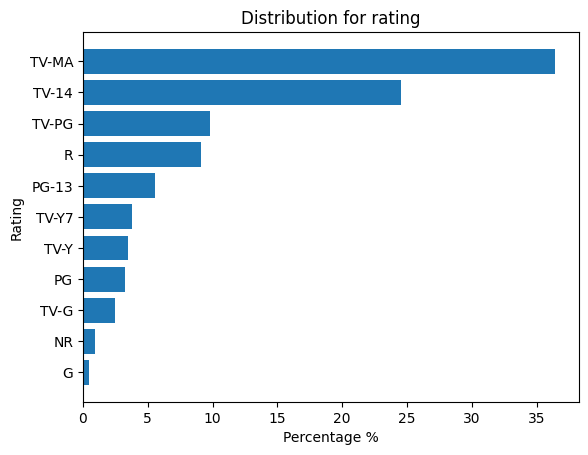

In [20]:
type_counts = dataset['rating'].value_counts()
percentages = (type_counts / type_counts.sum()) * 100
percentages = percentages[percentages > 0.1].sort_values()

fig, ax = plt.subplots()
ax.barh(percentages.index, percentages)
ax.set_title('Distribution for rating')
ax.set_xlabel('Percentage %')
ax.set_ylabel('Rating')
plt.show()

From the graph, we can see that the main ratings are:
* TV-MA (Mature Audience): the content is for adults and may contain explicit language, sexual content, or graphic violence
* TV-14 : indicates that the content may be inappropriate for children under 14
  
Together, these two categories make up more than 50% of the content on the platform.

## **Distribution of film and tv show duration**

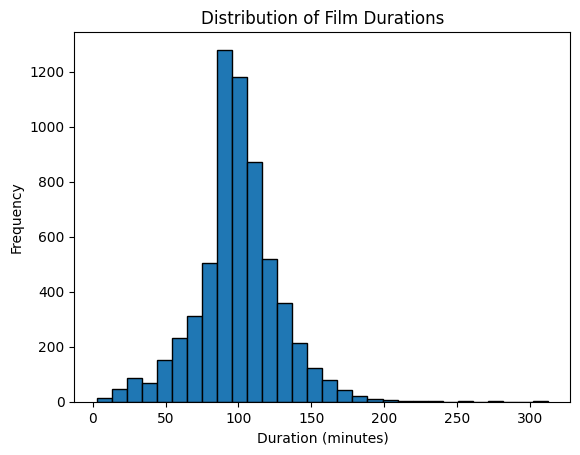

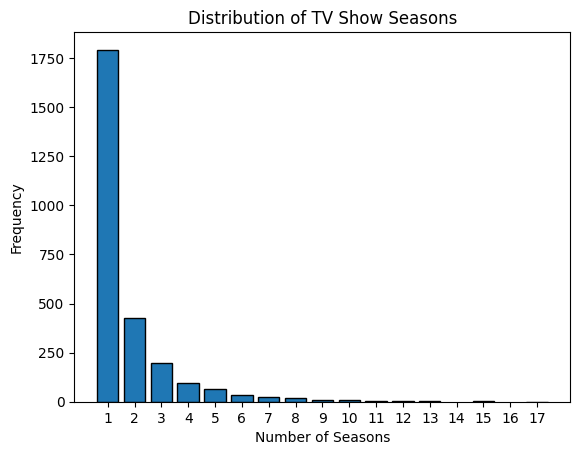

In [21]:
# FILM
film_durations = dataset[dataset['type'] == 'Movie']['duration']
film_durations = film_durations.dropna().map(lambda x: int(x.split(" ")[0]))

# distribuzione
fig, ax = plt.subplots()
ax.hist(film_durations, bins=30, edgecolor='black')
ax.set_title('Distribution of Film Durations')
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Frequency')
plt.show()

# SERIE TV
serie_duration = dataset[dataset['type'] == 'TV Show']['duration']
serie_duration = serie_duration.dropna().map(lambda x : int(x.split(" ")[0]))

# distribuzione
serie_duration_counts = serie_duration.value_counts().sort_index()

fig, ax = plt.subplots()
ax.bar(serie_duration_counts.index, serie_duration_counts.values, edgecolor='black')
ax.set_title('Distribution of TV Show Seasons')
ax.set_xlabel('Number of Seasons')
ax.set_ylabel('Frequency')
ax.set_xticks(range(1, serie_duration_counts.index.max() + 1))
plt.show()

This graph indicates that the majority of TV shows stop production after their first season, suggesting that many series don’t survive for long.

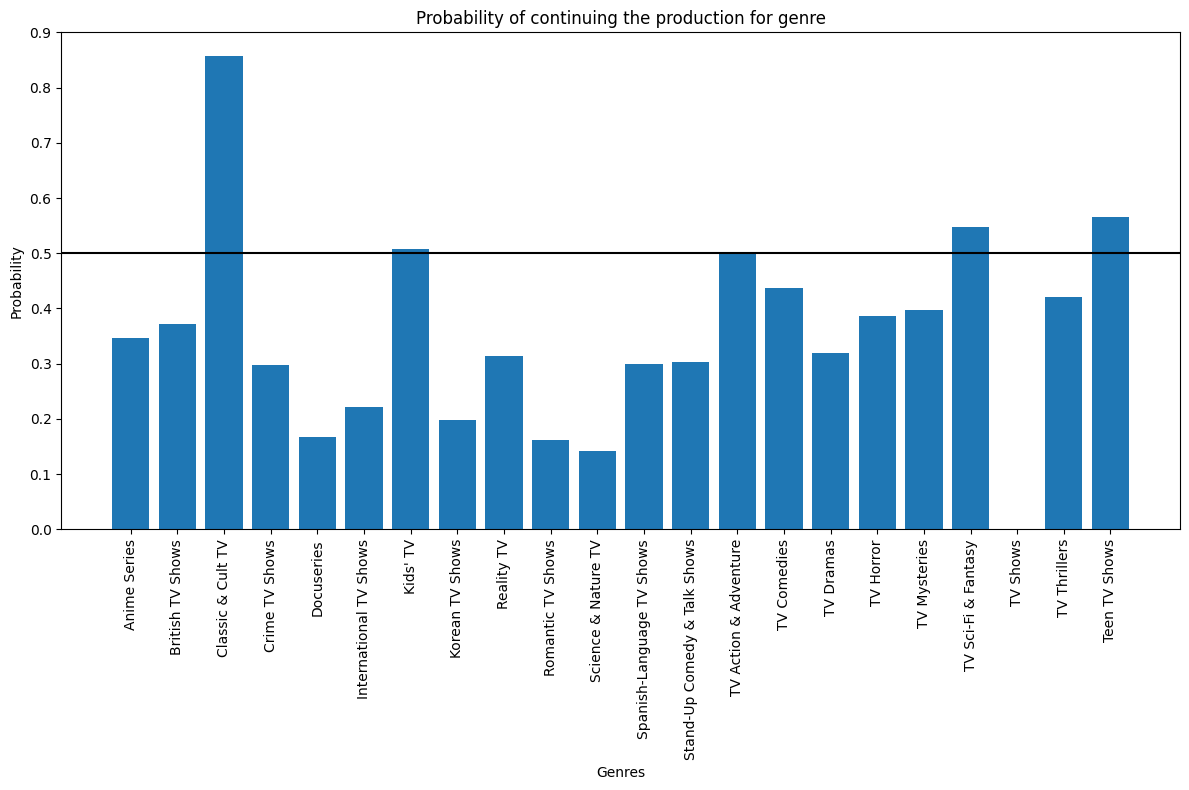

In [22]:
serie = dataset[dataset['type'] == "TV Show"].copy()
serie['listed_in'] = serie['listed_in'].str.split(",")
exploded = serie.explode('listed_in')
exploded['listed_in'] = exploded['listed_in'].str.strip()

exploded['num_seasons'] = exploded['duration'].apply(lambda x: x.split(" ")[0]).astype(int)

grouped = exploded.groupby('listed_in')['num_seasons']
count_tot = grouped.count()
count_2 = grouped.apply(lambda x: (x >= 2).sum())
probability = (count_2 / count_tot)


plt.figure(figsize=(12, 8))
plt.bar(probability.index, probability.values)
plt.xticks(rotation=90)
plt.title('Probability of continuing the production for genre')
plt.xlabel('Genres')
plt.ylabel('Probability')
plt.axhline(y=0.5, color='black')
plt.tight_layout()
plt.show()


Why this analysis? Through this analysis, we can understand which series categories are more likely to continue production after the first season; This can guide decision on content and budget allocation.

Considering only genres that has probability>50% to continuig the production, the analysis highlights the following categories:
* Classic & Cult TV
* Kids' TV
* TV Action & Adventure
* TV Sci-Fi & Fantasy
* Teen TV Shows

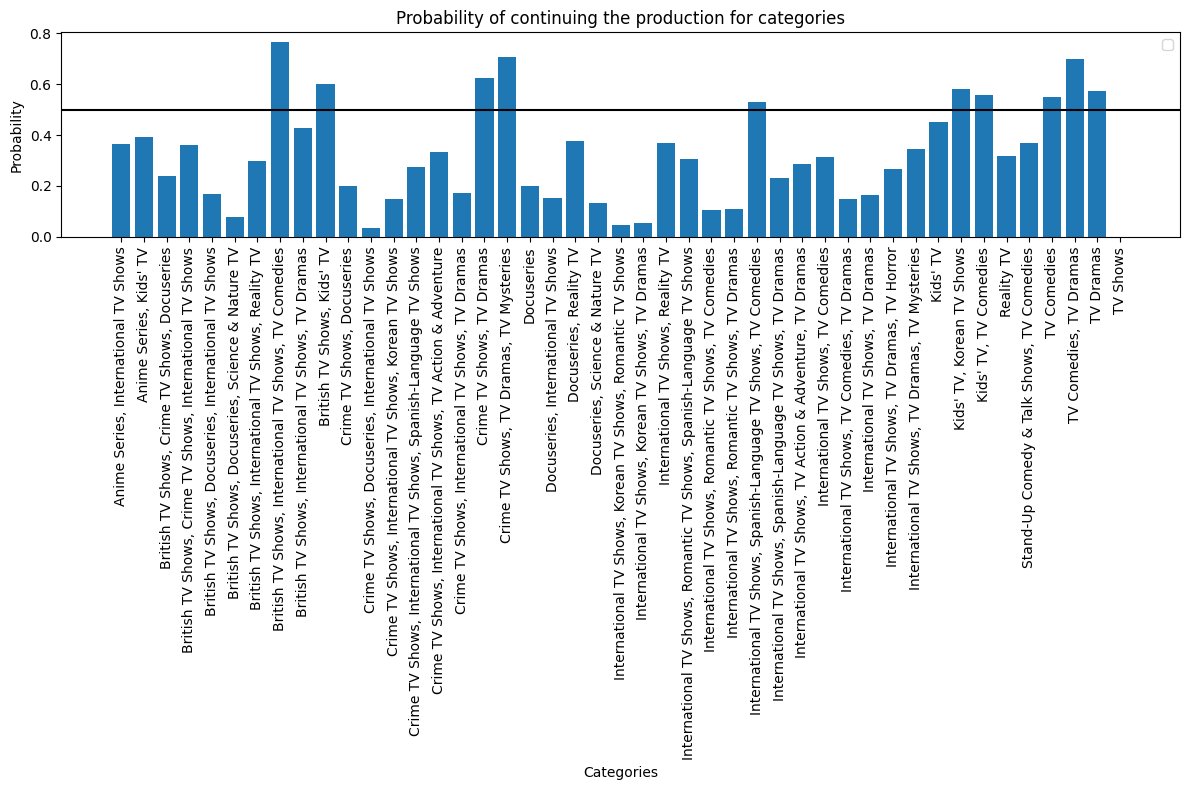

In [23]:
serie = dataset[dataset['type'] == "TV Show"].copy()

serie['num_seasons'] = serie['duration'].apply(lambda x: x.split(" ")[0]).astype(int)

grouped = serie.groupby('listed_in')['num_seasons']
count_tot = grouped.count()

mask = count_tot > len(serie) * (0.5/100)

count_tot = count_tot[mask]
count_2 = grouped.apply(lambda x: (x >= 2).sum())[mask]
probability = (count_2 / count_tot)

plt.figure(figsize=(12, 8))
plt.bar(probability.index, probability.values)
plt.xticks(rotation=90)
plt.title('Probability of continuing the production for categories')
plt.xlabel('Categories')
plt.ylabel('Probability')
plt.axhline(y=0.5, color='black')
plt.legend()
plt.tight_layout()
plt.show()

Considering not the single genres but the concatenation, we can see that the result respect the previous analysis is different.

Considering only categories that has probability>50%, the analysis highlights the following categories:
* British TV Shows, International TV Shows, TV Comedies
* British TV Shows, Kids' TV
* Crime TV Shows, TV Dramas
* Crime TV Shows, TV Dramas, TV Mysteries
* International TV Shows, Spanish-Language TV Shows, TV Comedies
* Kids' TV, Korean TV Shows
* Kids' TV, TV Comedies
* TV Comedies
* TV Comedies, TV Dramas
* TV Dramas

Most recurrent genres are: International, Comedies, Kids', Crime, and Dramas, that are not the genres finded in the previous analysis. So in conclusion we can say that a combination of genres can represent a successful production strategy, even if the individual genres alone don't lead to long-running series.

## **Distribution of genre per film and tv show**

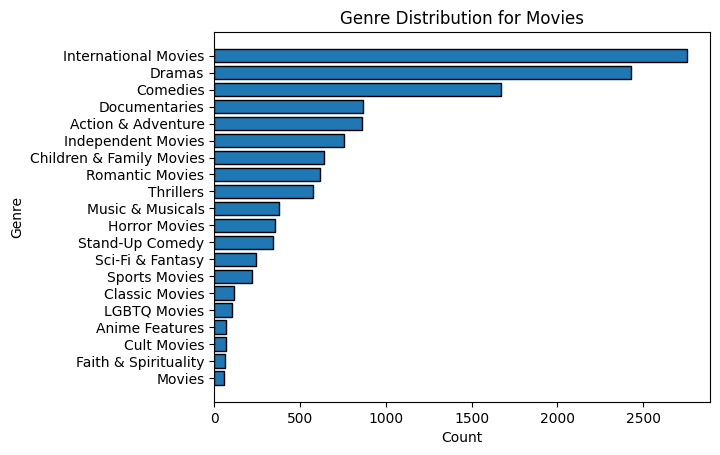

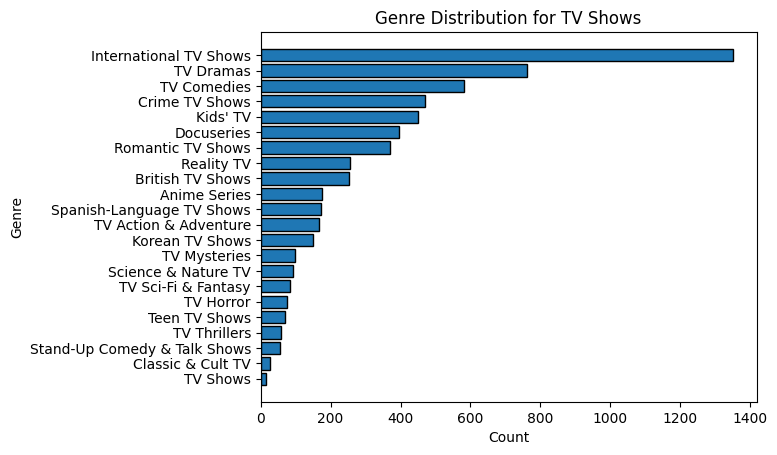

In [24]:
# film
film = dataset[dataset['type'] == 'Movie']['listed_in']
count = film.str.split(",").explode().str.strip().value_counts().sort_values()

fig, ax = plt.subplots()
ax.barh(count.index, count.values, edgecolor='black')
ax.set_title('Genre Distribution for Movies')
ax.set_xlabel('Count')
ax.set_ylabel('Genre')
plt.show()

# series
series = dataset[dataset['type'] == 'TV Show']['listed_in']
count = series.str.split(",").explode().str.strip().value_counts().sort_values()

fig, ax = plt.subplots()
ax.barh(count.index, count.values, edgecolor='black')
ax.set_title('Genre Distribution for TV Shows')
ax.set_xlabel('Count')
ax.set_ylabel('Genre')
plt.show()

This analysis show up that in both Film and TV shows, the top-3 genre are International, Drama and Commedies.

Comparing the analysis of TV shows with the previous one, we can say that: the most produced genres tend to be the least long-lived, while those with greater longevity are less produced.

Take, for example, the Classic & Cult genre: it is one of the longest-lived, with a high probability of continued production of around 0.85, but at the same time it is not widely produced.

On the other hand, take the International genre, which is the most produced but has a relatively low probability of continuing production, around 0.25.

In conclusion, we can say that combining less long-lived genres could be an effective strategy.

## **Film and tv show most long**

In [25]:
# tv show with most season
series = dataset[dataset["type"] == "TV Show"][["duration", "title"]].dropna()
series["duration"] = series["duration"].map(lambda x: int(x.split(" ")[0]))
print(series[series["duration"] == series["duration"].max()])

# film più lungo
film = dataset[dataset["type"] == "Movie"][["duration", "title"]].dropna()
film["duration"] = film["duration"].map(lambda x : int(x.split(" ")[0]))
print(film[film["duration"] == film["duration"].max()])

     duration           title
548        17  Grey's Anatomy
      duration                       title
4253       312  Black Mirror: Bandersnatch


Most long tv show is 'Grey's Anatomy' with 17 season; while most long film is 'Black Mirror: Bandersnatch' with 321 minutes.